In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
df = pd.read_csv('gender_submission.csv')


In [ ]:
# Data Cleaning
print("Initial data shape:", df.shape)
print("\nMissing values:")
print(df.isnull().sum())
# Remove duplicates if any
df.drop_duplicates(inplace=True)
print("\nData shape after removing duplicates:", df.shape)

Initial data shape: (418, 2)

Missing values:
PassengerId    0
Survived       0
dtype: int64

Data shape after removing duplicates: (418, 2)


In [ ]:
# Data type check
print("\nData types:")
print(df.dtypes)
# Convert 'Survived' to categorical
df['Survived'] = df['Survived'].astype('category')




Data types:
PassengerId    int64
Survived       int64
dtype: object


In [ ]:
# Exploratory Data Analysis
# 1. Basic statistics
print("\nBasic statistics:")
print(df.describe())



Basic statistics:
       PassengerId
count   418.000000
mean   1100.500000
std     120.810458
min     892.000000
25%     996.250000
50%    1100.500000
75%    1204.750000
max    1309.000000


In [ ]:
# survival rate
df['Survived'] = pd.to_numeric(df['Survived'], errors='coerce')

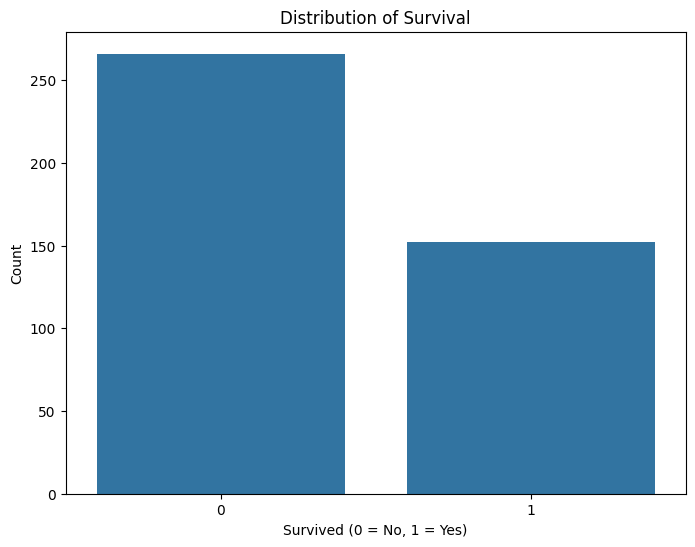

In [ ]:
# 3. Visualization: Survival distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='Survived', data=df)
plt.title('Distribution of Survival')
plt.xlabel('Survived (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()

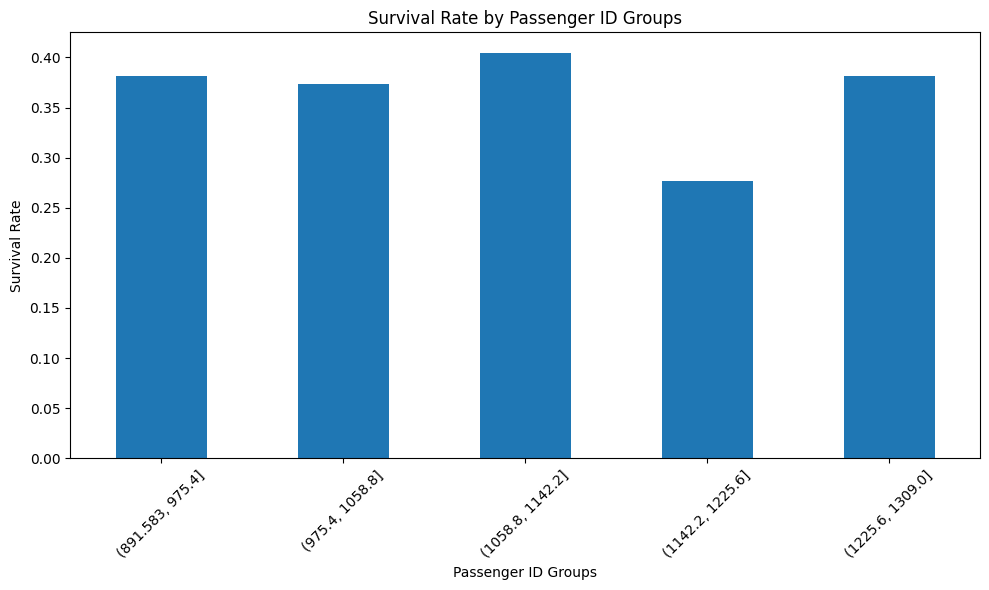

In [35]:
# 4. Visualization: Survival rate by PassengerId groups
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv('gender_submission.csv')

# Create 'PassengerGroup' based on PassengerId
df['PassengerGroup'] = pd.cut(df['PassengerId'], bins=5)

# Calculate survival rates by group
# Add observed=True to address the warning
survival_by_group = df.groupby('PassengerGroup', observed=True)['Survived'].mean()

# Create the bar plot
plt.figure(figsize=(10, 6))
survival_by_group.plot(kind='bar')
plt.title('Survival Rate by Passenger ID Groups')
plt.xlabel('Passenger ID Groups')
plt.ylabel('Survival Rate')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
# 5. Correlation analysis
correlation = df['PassengerId'].corr(df['Survived'])
print(f"\nCorrelation between PassengerId and Survived: {correlation:.4f}")


Correlation between PassengerId and Survived: -0.0232


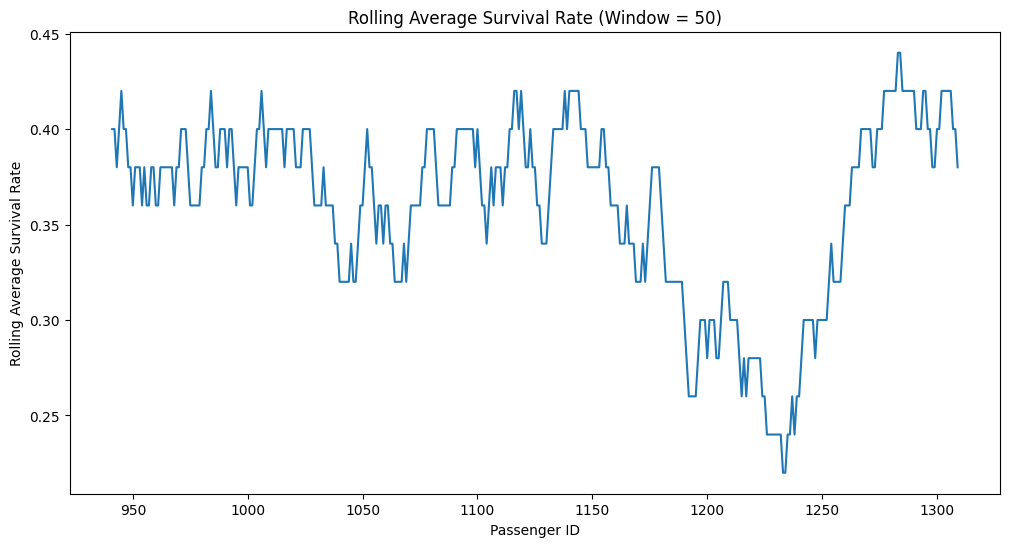

In [ ]:
# 6. Time series-like analysis of survival rate
df['Survived_Rolling'] = df['Survived'].rolling(window=50).mean()

plt.figure(figsize=(12, 6))
plt.plot(df['PassengerId'], df['Survived_Rolling'])
plt.title('Rolling Average Survival Rate (Window = 50)')
plt.xlabel('Passenger ID')
plt.ylabel('Rolling Average Survival Rate')
plt.show()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
df = pd.read_csv('test.csv')

In [ ]:
print("Initial data shape:", df.shape)
print("\nMissing values:")
print(df.isnull().sum())

# Handle missing values
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Fare'].fillna(df['Fare'].median(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)
df['Cabin'].fillna('Unknown', inplace=True)

Initial data shape: (418, 11)

Missing values:
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [ ]:
import pandas as pd
df = pd.read_csv('test.csv') # Create the DataFrame 'df' by loading the data

df['Sex'] = df['Sex'].astype('category')
df['Embarked'] = df['Embarked'].astype('category')

# Create a 'Title' feature from Name
df['Title'] = df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
df['Title'] = df['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
df['Title'] = df['Title'].replace('Mlle', 'Miss')
df['Title'] = df['Title'].replace('Ms', 'Miss')
df['Title'] = df['Title'].replace('Mme', 'Mrs')
df['Title'] = df['Title'].astype('category')

In [ ]:
# Drop unnecessary columns
df.drop(['Name', 'Ticket'], axis=1, inplace=True)

print("\nData types after cleaning:")
print(df.dtypes)


Data types after cleaning:
PassengerId       int64
Pclass            int64
Sex            category
Age             float64
SibSp             int64
Parch             int64
Fare            float64
Cabin            object
Embarked       category
Title          category
dtype: object


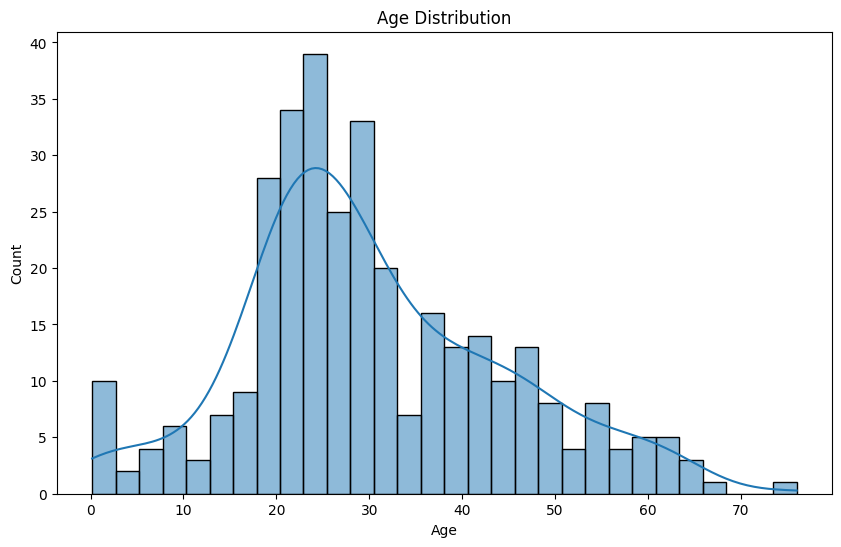

In [ ]:
# Exploratory Data Analysis
import matplotlib.pyplot as plt
import seaborn as sns
# 1. Age distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], bins=30, kde=True)
plt.title('Age Distribution')
plt.show()

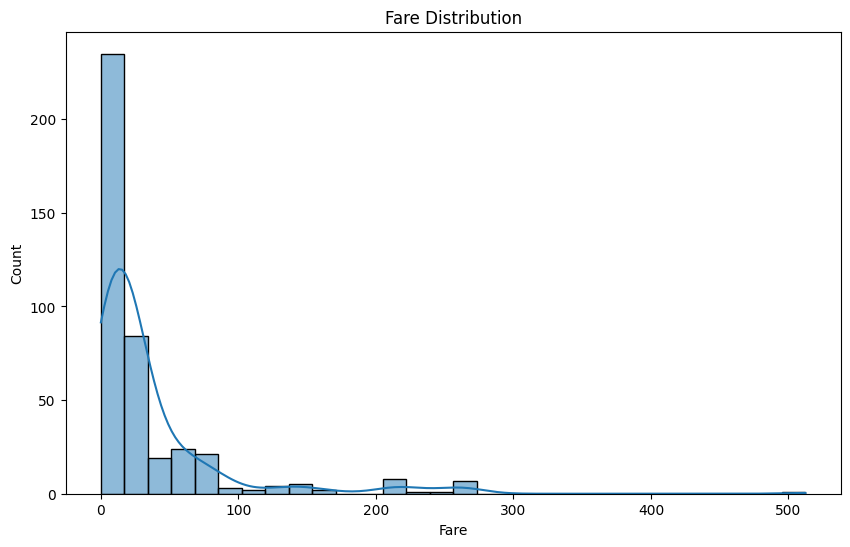

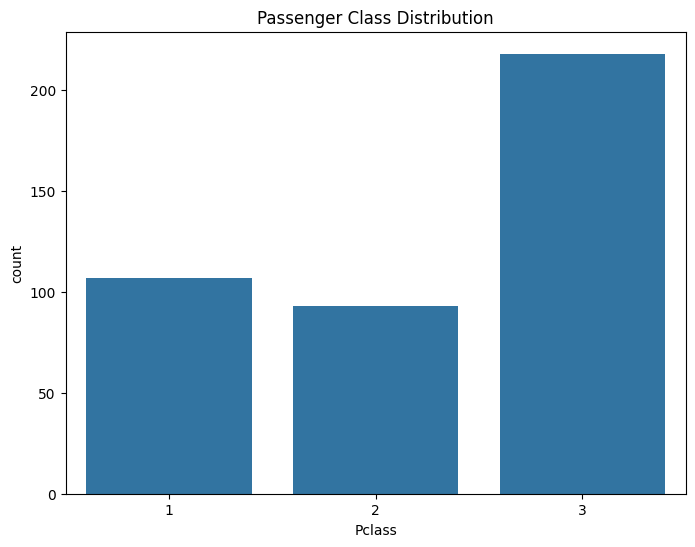

In [ ]:
# 2. Fare distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['Fare'], bins=30, kde=True)
plt.title('Fare Distribution')
plt.show()

# 3. Passenger class distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='Pclass', data=df)
plt.title('Passenger Class Distribution')
plt.show()

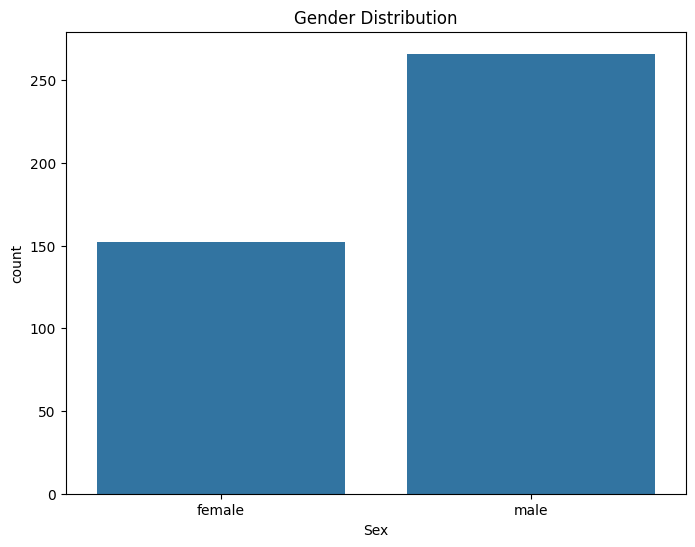

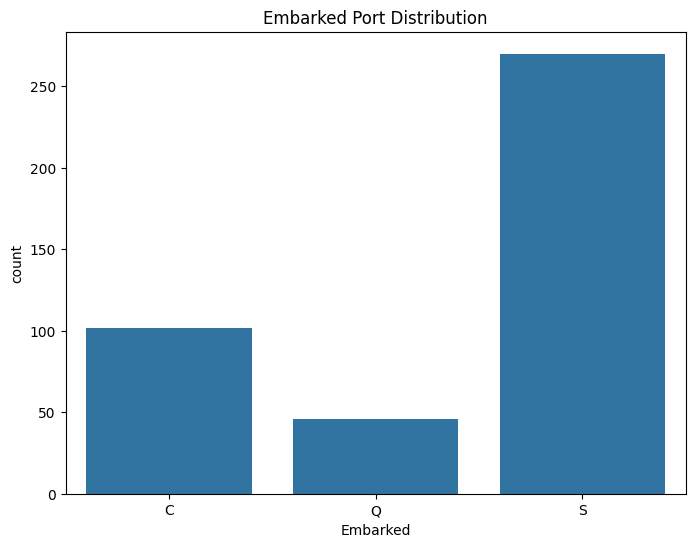

In [ ]:
# 4. Gender distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='Sex', data=df)
plt.title('Gender Distribution')
plt.show()

# 5. Embarked port distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='Embarked', data=df)
plt.title('Embarked Port Distribution')
plt.show()

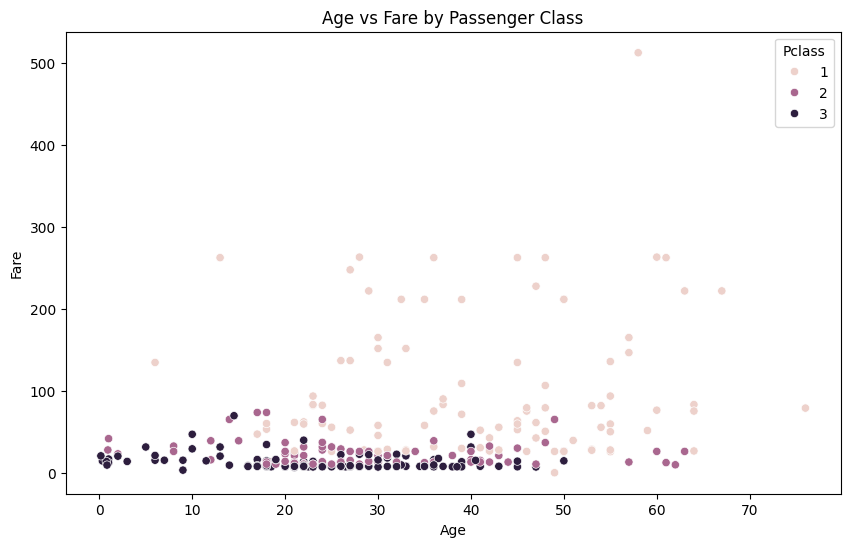

In [ ]:
# 6. Age vs Fare
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Fare', hue='Pclass', data=df)
plt.title('Age vs Fare by Passenger Class')
plt.show()

<Axes: >

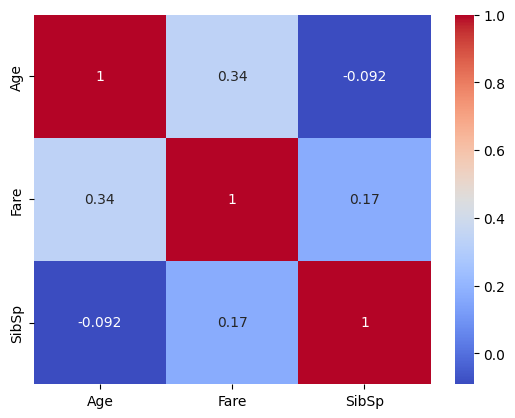

In [ ]:
# Assuming your DataFrame has columns named 'Age' and 'Fare', and you want to include another numeric column:
columns_to_correlate = ['Age', 'Fare', 'SibSp']  # Replace 'SibSp' with the actual column name you want to use
sns.heatmap(df[columns_to_correlate].corr(), annot=True, cmap='coolwarm')

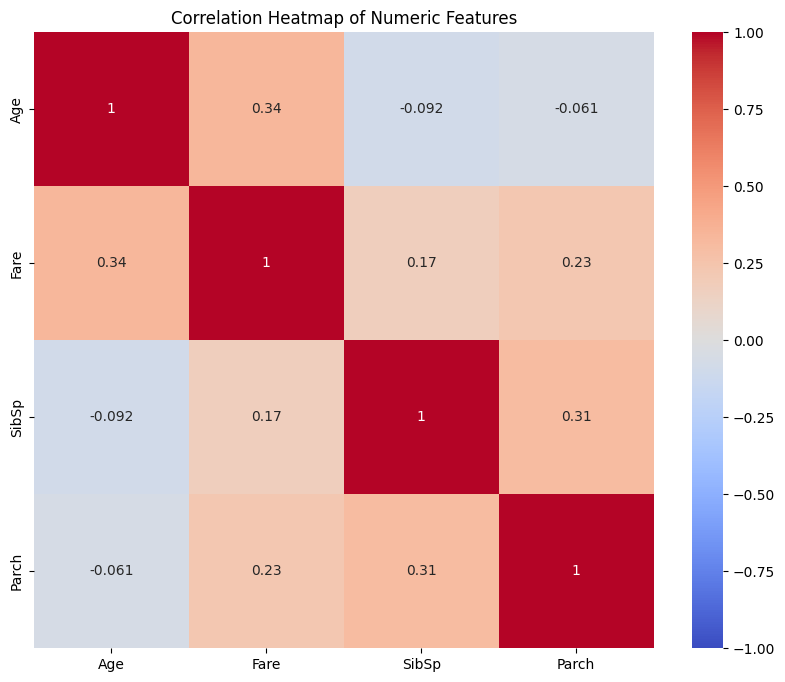

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Create correlation heatmap
numeric_columns = ['Age', 'Fare', 'SibSp', 'Parch']
correlation_matrix = df[numeric_columns].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Correlation Heatmap of Numeric Features')
plt.show()

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the Titanic dataset
data = pd.read_csv('train.csv')

# Display the first few rows of the dataset
print(data.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [ ]:
# Data Cleaning
# Check for missing values
missing_values = data.isnull().sum()
print("Missing Values:\n", missing_values)
# Fill missing values for 'Age' with the mean age
data['Age'].fillna(data['Age'].mean(), inplace=True)

Missing Values:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [ ]:
# Drop the 'Cabin' column due to excessive missing values
data.drop(columns=['Cabin'], inplace=True)
# Fill missing values for 'Embarked' with the mode
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)
# Convert 'Sex' to numerical values
data['Sex'] = data['Sex'].map({'male': 0, 'female': 1})

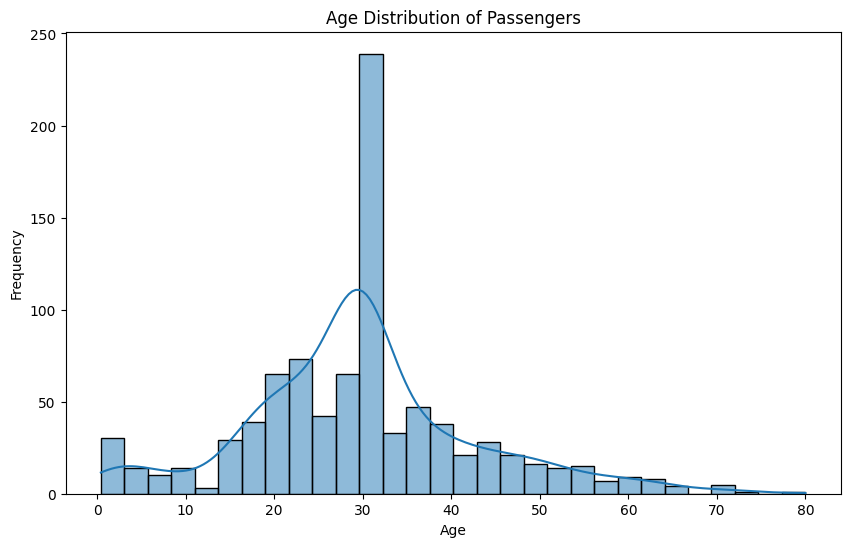

In [ ]:
# Exploratory Data Analysis (EDA)
# Visualize the distribution of ages
plt.figure(figsize=(10, 6))
sns.histplot(data['Age'], bins=30, kde=True)
plt.title('Age Distribution of Passengers')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


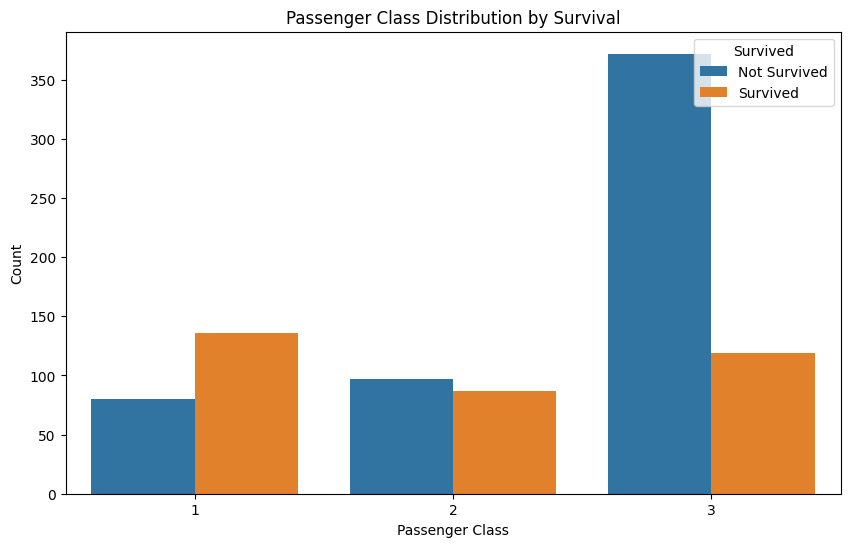

In [ ]:
# Explore the relationship between 'Pclass' and survival
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='Pclass', hue='Survived')
plt.title('Passenger Class Distribution by Survival')
plt.xlabel('Passenger Class')
plt.ylabel('Count')
plt.legend(title='Survived', loc='upper right', labels=['Not Survived', 'Survived'])
plt.show()

In [ ]:
# Analyze survival rate by passenger class
survival_rate = data.groupby('Pclass')['Survived'].mean()
print("Survival Rate by Passenger Class:\n", survival_rate)

Survival Rate by Passenger Class:
 Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64


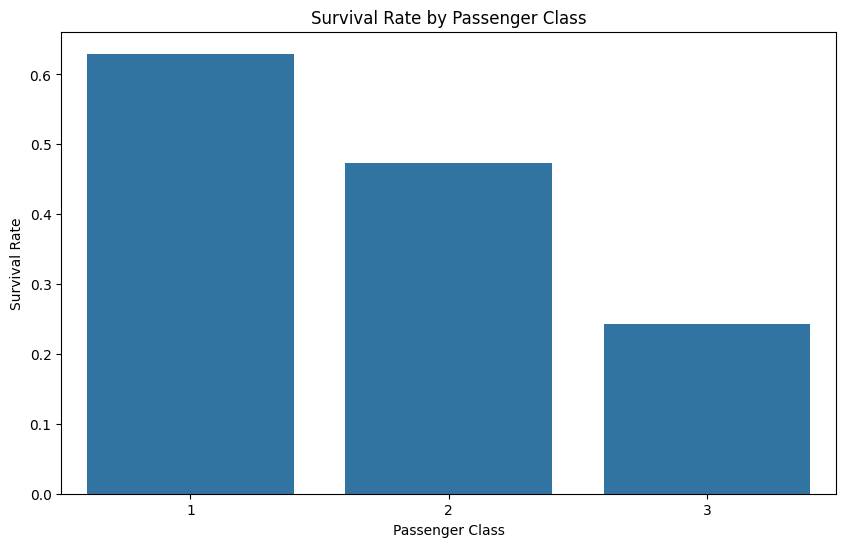

In [ ]:
# Visualize survival rate by class
plt.figure(figsize=(10, 6))
sns.barplot(x=survival_rate.index, y=survival_rate.values)
plt.title('Survival Rate by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')
plt.show()

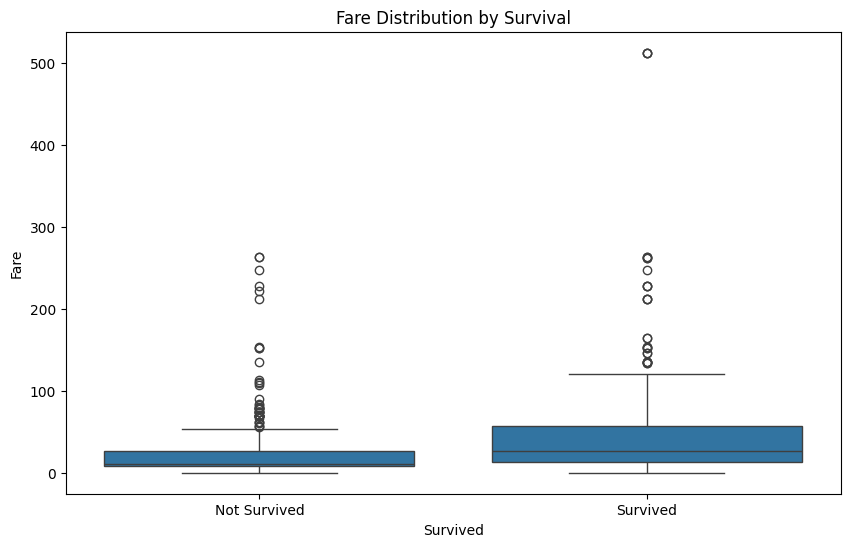

In [ ]:
# Analyze the relationship between 'Fare' and survival
plt.figure(figsize=(10, 6))
sns.boxplot(x='Survived', y='Fare', data=data)
plt.title('Fare Distribution by Survival')
plt.xlabel('Survived')
plt.ylabel('Fare')
plt.xticks([0, 1], ['Not Survived', 'Survived'])
plt.show()

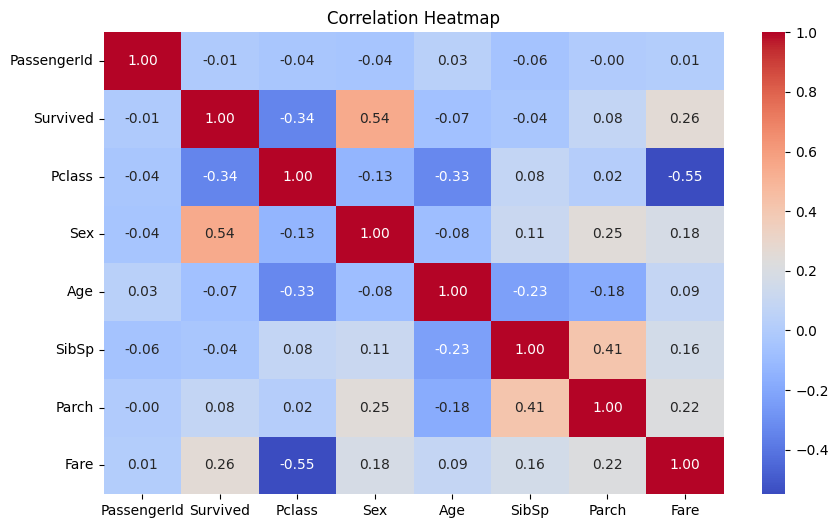

In [ ]:
# Correlation heatmap
plt.figure(figsize=(10, 6))
# Select only numeric columns for correlation calculation
numeric_data = data.select_dtypes(include=['number'])
correlation_matrix = numeric_data.corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()